<a href="https://colab.research.google.com/github/willkakuta/Cases_DNC/blob/main/Case_Classificacao_Resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Target:

#Churn — Cliente deu churn ou não

#Variáveis numéricas:

#Tenure — Número de meses que o cliente está na base
#MonthlyCharges — A quantia consumida por cliente mensalmente
#TotalCharges — A quantia consumida por cliente total

#Variáveis categóricas:

#CustomerID - Id do cliente
#Gender — M/F
#SeniorCitizen — Se o cidadão é ou não idoso (0,1)
#Partner — Se o cliente é ou não casado
#Dependents — Cliente tem dependentes (Yes, No)
#PhoneService — Cliente tem serviço telefonico (Yes, No)
#MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)
#InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)
#OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)
#OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)
#DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)
#TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)
#StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)
#StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)
#Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)
#PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)
#PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [4]:
churn = pd.read_excel('/content/churn_data.xlsx')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
churn.isna().count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [10]:
churn_agg = churn.groupby('Churn')['customerID'].count().reset_index()
churn_agg

,Churn,customerID
0,No,5163
1,Yes,1869


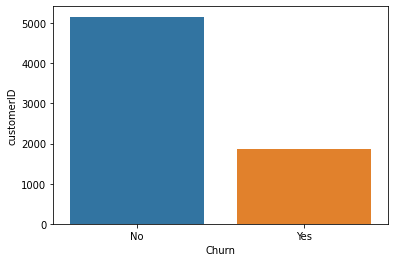

In [11]:
sns.barplot(data = churn_agg, x='Churn', y='customerID')

In [14]:
churn_payment = churn.groupby('PaymentMethod')['customerID'].count().reset_index()
churn_payment = pd.DataFrame(churn_payment)
churn_payment

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


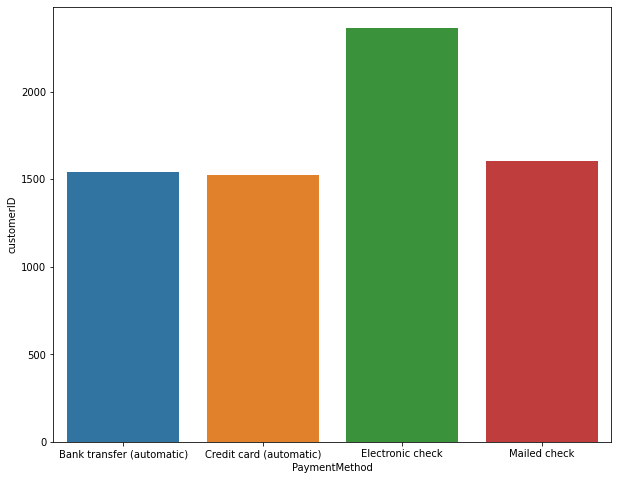

In [15]:
plt.figure(figsize=[10,8])
sns.barplot(data=churn_payment, x='PaymentMethod', y='customerID')

In [16]:
churn_gender = churn.groupby('gender')['customerID'].count().reset_index()
churn_gender = pd.DataFrame(churn_gender)
churn_gender

,gender,customerID
0,Female,3483
1,Male,3549


In [17]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
X = churn.drop(columns=['customerID', 'Churn'], axis=1)

y = churn[['Churn']]

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
X = pd.get_dummies(X)

In [21]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [25]:
X_test.assign(churn=y_test).assign(label= lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
1146,0.0,0.563380,0.219900,0.191444,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2997,0.0,0.366197,0.631343,0.253144,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
6491,0.0,0.281690,0.167662,0.086730,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
1127,0.0,0.183099,0.462189,0.106416,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0
2577,0.0,0.154930,0.866169,0.145032,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1.0,0.647887,0.674627,0.443896,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
845,0.0,0.154930,0.148259,0.049152,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
2053,0.0,1.000000,0.680597,0.716132,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2061,0.0,0.887324,0.065174,0.172634,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


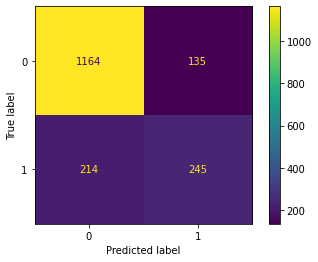

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test, values_format='d')

In [36]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f'Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}')

print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}')

print(f'Acurácia Precisão (Treino): {precision_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Precisão (Teste): {precision_score(y_test, lr.predict(X_test))}')

print(f'Acurácia Recall (Treino): {recall_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Recall (Teste): {recall_score(y_test, lr.predict(X_test))}')

print(f'Acurácia F1 (Treino): {f1_score(y_train, lr.predict(X_train))}')
print(f'Acurácia F1 (Teste): {f1_score(y_test, lr.predict(X_test))}')

print(f'Acurácia Roc (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}')
print(f'Acurácia Roc (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')

Acurácia (Treino): 0.806977626090254
Acurácia (Teste): 0.8014789533560864
Acurácia Balanceada (Treino): 0.7277399674023171
Acurácia Balanceada (Teste): 0.7149214830915687
Acurácia Precisão (Treino): 0.6661016949152543
Acurácia Precisão (Teste): 0.6447368421052632
Acurácia Recall (Treino): 0.5574468085106383
Acurácia Recall (Teste): 0.5337690631808278
Acurácia F1 (Treino): 0.6069498069498069
Acurácia F1 (Teste): 0.5840286054827176
Acurácia Roc (Treino): 0.8510189529095634
Acurácia Roc (Teste): 0.8333920344290311


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [30]:
rf.fit(X_train, y_train)

<ipython-input-30-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [31]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
X_test.assign(churn = y_test).assign(label=rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
1146,0.0,0.563380,0.219900,0.191444,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2997,0.0,0.366197,0.631343,0.253144,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
6491,0.0,0.281690,0.167662,0.086730,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
1127,0.0,0.183099,0.462189,0.106416,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0
2577,0.0,0.154930,0.866169,0.145032,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1.0,0.647887,0.674627,0.443896,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
845,0.0,0.154930,0.148259,0.049152,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
2053,0.0,1.000000,0.680597,0.716132,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2061,0.0,0.887324,0.065174,0.172634,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


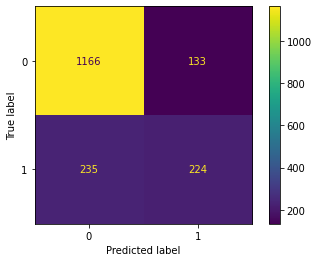

In [33]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test, values_format='d')

In [37]:
print(f'Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}')

print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}')

print(f'Acurácia Precisão (Treino): {precision_score(y_train, rf.predict(X_train))}')
print(f'Acurácia Precisão (Teste): {precision_score(y_test, rf.predict(X_test))}')

print(f'Acurácia Recall (Treino): {recall_score(y_train, rf.predict(X_train))}')
print(f'Acurácia Recall (Teste): {recall_score(y_test, rf.predict(X_test))}')

print(f'Acurácia F1 (Treino): {f1_score(y_train, rf.predict(X_train))}')
print(f'Acurácia F1 (Teste): {f1_score(y_test, rf.predict(X_test))}')

print(f'Acurácia Roc(Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}')
print(f'Acurácia Roc(Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}')

Acurácia (Treino): 0.9979142965491088
Acurácia (Teste): 0.7906712172923777
Acurácia Balanceada (Treino): 0.997450552839082
Acurácia Balanceada (Teste): 0.6928154890388283
Acurácia Precisão (Treino): 0.9957476966690291
Acurácia Precisão (Teste): 0.6274509803921569
Acurácia Recall (Treino): 0.9964539007092199
Acurácia Recall (Teste): 0.4880174291938998
Acurácia F1 (Treino): 0.9961006735200284
Acurácia F1 (Teste): 0.5490196078431373
Acurácia Roc(Treino): 0.9998960214674831
Acurácia Roc(Teste): 0.8071023294271947


In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'n_estimators': [100,300,500]
}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [44]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [45]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
rf_tunned = RandomForestClassifier(
  bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 8,
 max_features= 'auto',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 500,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False
)

rf_tunned

RandomForestClassifier(max_depth=8, n_estimators=500)

In [52]:
rf_tunned.fit(X_train, y_train)

<ipython-input-52-23d38da6abb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=500)

In [53]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [54]:
X_test.assign(churn=y_test).assign(label=rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
1146,0.0,0.563380,0.219900,0.191444,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2997,0.0,0.366197,0.631343,0.253144,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
6491,0.0,0.281690,0.167662,0.086730,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
1127,0.0,0.183099,0.462189,0.106416,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0
2577,0.0,0.154930,0.866169,0.145032,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1.0,0.647887,0.674627,0.443896,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
845,0.0,0.154930,0.148259,0.049152,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
2053,0.0,1.000000,0.680597,0.716132,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2061,0.0,0.887324,0.065174,0.172634,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


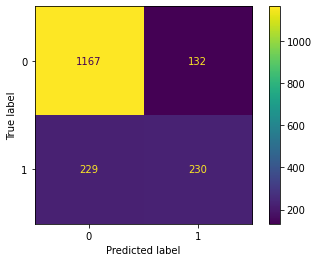

In [55]:
plot_confusion_matrix(rf_tunned, X_test, y_test, values_format='d')

In [56]:
print(f'Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}')

print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}')

print(f'Acurácia Precisão (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia Precisão (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}')

print(f'Acurácia Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}')

print(f'Acurácia F1 (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia F1 (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}')

print(f'Acurácia Roc(Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}')
print(f'Acurácia Roc(Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}')

Acurácia (Treino): 0.8375047402351157
Acurácia (Teste): 0.7946530147895335
Acurácia Balanceada (Treino): 0.7620859213250517
Acurácia Balanceada (Teste): 0.6997363482216084
Acurácia Precisão (Treino): 0.742756804214223
Acurácia Precisão (Teste): 0.6353591160220995
Acurácia Recall (Treino): 0.6
Acurácia Recall (Teste): 0.5010893246187363
Acurácia F1 (Treino): 0.6637897214593959
Acurácia F1 (Teste): 0.5602923264311814
Acurácia Roc(Treino): 0.9107136433049938
Acurácia Roc(Teste): 0.8346532693994542
